In [262]:
pip install tensorflow

In [263]:
import tensorflow as tf
print(tf.__version__)
# tf.debugging.set_log_device_placement(True

2.19.0


In [264]:
##import basic lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [266]:
#Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [267]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [268]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [269]:
##Feature engineering
geography = pd.get_dummies(X['Geography'],drop_first = True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first= True).astype(int)


In [270]:
##concatenate this with dataframe
X = X.drop(['Geography','Gender'],axis = 1)

In [271]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [272]:
X = pd.concat([X,geography,gender],axis=1)

In [273]:
##Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [274]:
##Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [275]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [276]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [277]:
X_train.shape

(8000, 11)

In [278]:
X_test.shape

(2000, 11)

In [279]:
##Part2 Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [280]:
##Lets initialise the ANN
classifier = Sequential()

In [281]:
##Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [282]:
#Adding first hidden layer
classifier.add(Dense(units=7,activation='relu'),Dropout(0.3))

In [283]:
#Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'),Dropout(0.2))

In [284]:
##Adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [285]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [286]:
##Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [287]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [288]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6362 - loss: 0.6112 - val_accuracy: 0.7955 - val_loss: 0.4648
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8036 - loss: 0.4385 - val_accuracy: 0.8084 - val_loss: 0.4362
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8094 - loss: 0.4301 - val_accuracy: 0.8205 - val_loss: 0.4194
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8325 - loss: 0.3974 - val_accuracy: 0.8254 - val_loss: 0.4062
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.3828 - val_accuracy: 0.8360 - val_loss: 0.3927
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8475 - loss: 0.3644 - val_accuracy: 0.8429 - val_loss: 0.3800
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.3436 - val_accuracy: 0.8425 - val_loss: 0.3737
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8623 - loss: 0.3477 - 

In [289]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

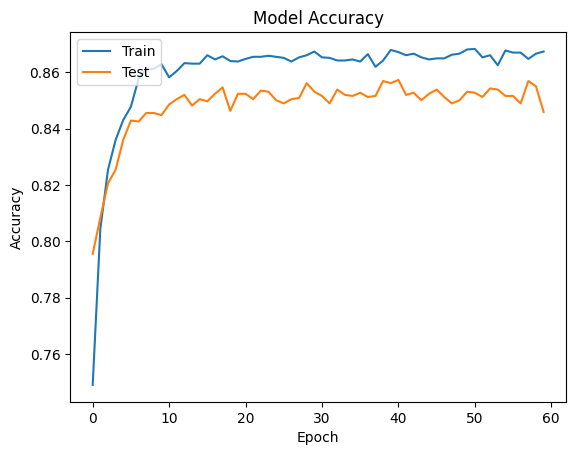

In [290]:
##Suumarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Text(0.5, 0, 'Epoch')

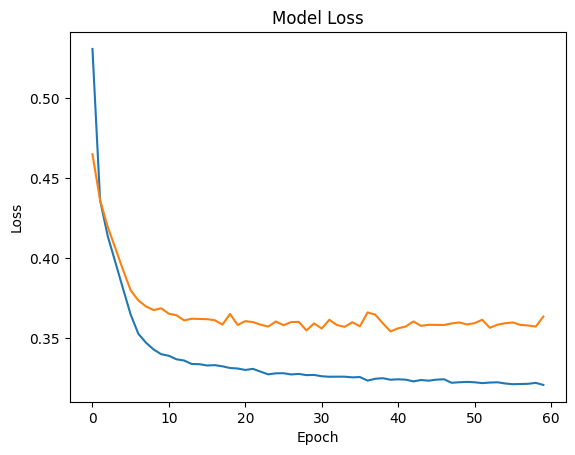

In [291]:
#Plt for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [292]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [293]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [294]:
##make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [295]:
cm

array([[1475,  120],
       [ 174,  231]])

In [296]:
##Calaculate teh accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.853

In [297]:
##get the weights
classifier.get_weights()

[array([[-0.17045012, -0.03216613, -0.21539572, -0.03330803, -0.06073394,
          0.13166605, -0.02939677, -0.02122512,  0.02717268, -0.09140889,
          0.13803875],
        [-0.14732285, -0.28838924, -0.8657556 ,  0.010652  ,  0.10584949,
         -0.7654957 ,  0.55509514,  0.4349911 ,  0.13265865, -0.8072091 ,
          0.516246  ],
        [ 0.24756354,  0.07152835, -0.03375661, -0.06291077, -0.04691336,
         -0.20808119, -0.09086061, -0.32666865, -0.09882544,  0.36797136,
          0.60430783],
        [-0.55475473,  0.00758896,  0.28945774, -0.20499182, -0.35640228,
         -0.10670064,  0.06122578, -0.63776404,  0.56450295,  0.37667608,
         -0.17378856],
        [ 0.03137112,  0.39289668,  0.1893282 , -1.3056484 ,  1.1691871 ,
          0.03664698, -0.20287275, -0.17900695,  1.0418738 , -0.13859375,
         -0.02960812],
        [ 0.04415401, -0.02715742,  0.11534158, -0.01753116,  0.07133241,
         -0.13341735,  0.15212953, -0.6003156 , -0.07317236,  0.1458061